#ML Model
#Hotel bookings prediction on is canceled or not?

#Import required Libraries

In [ ]:
#Basic and most important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import cross_val_score
#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Import Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [ ]:
#Explore the data-shape
data.shape

(119390, 32)

In [ ]:
#Explore the Datatypes
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

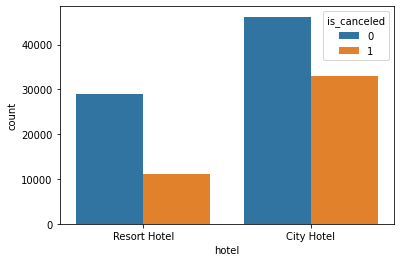

In [ ]:
#visualizing feature to feature
sns.countplot(x="hotel",hue="is_canceled",data=data)

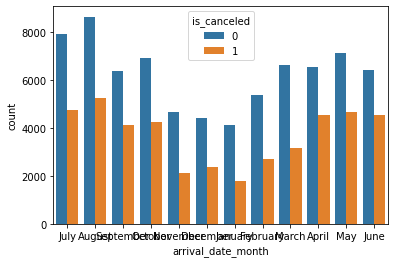

In [ ]:
sns.countplot(x="arrival_date_month",hue="is_canceled",data=data)

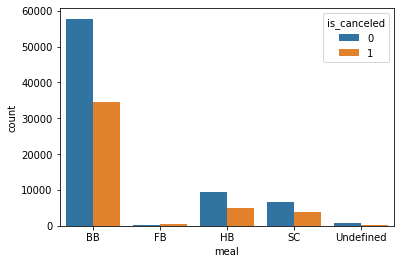

In [ ]:
sns.countplot(x="meal",hue="is_canceled",data=data)

#Correlation between all the Features

In [ ]:
correlation_mat = data.corr()
correlation_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


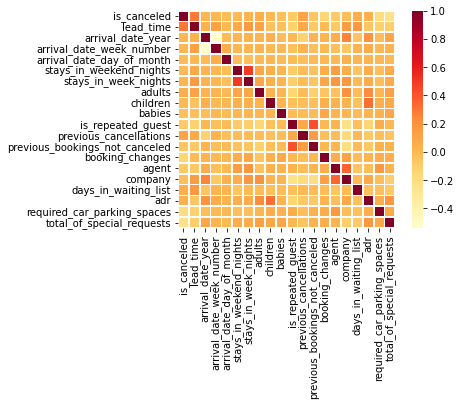

In [ ]:
# Visualizing correlation through heatmap
sns.heatmap( correlation_mat ,square=True,linewidths=0.8,cmap="YlOrRd")

#Describe Statistical Summary

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#Check for Null Values

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

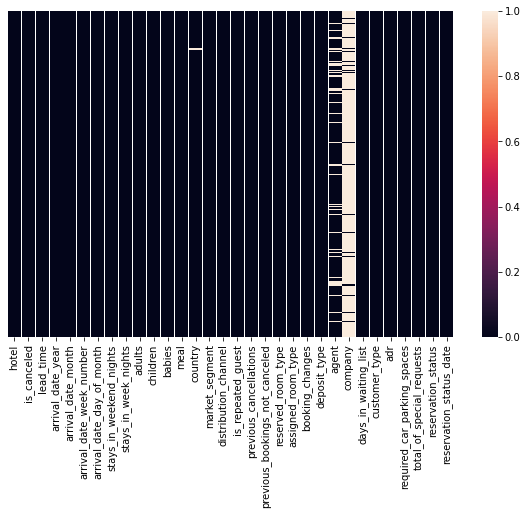

In [ ]:
#visualizing null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [ ]:
#print(data["country"].value_counts())
#print(data["agent"].value_counts())
#print(data["company"].value_counts())
#print(data["children"].value_counts())

In [ ]:
# Replace Null values with median for int and float and mode for object type
data["country"].fillna(data["country"].mode()[0],inplace=True)
data["agent"].fillna(data["agent"].median(),inplace=True)
data["company"].fillna(data["company"].median(),inplace=True)
data["children"].fillna(data["children"].median(),inplace=True)

#veryfing the null values
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

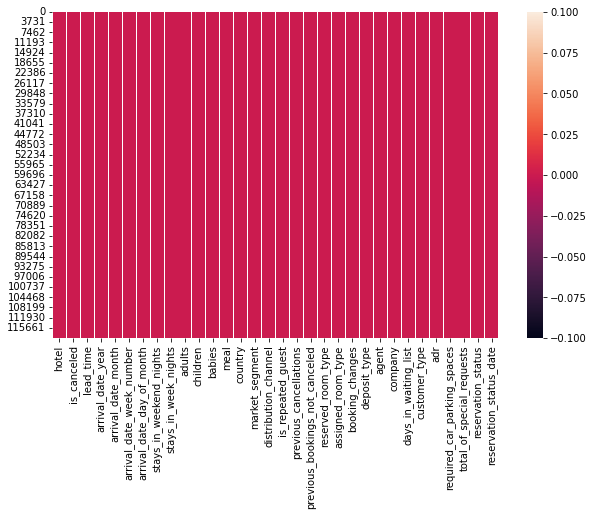

In [ ]:
#visualizing null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [ ]:
# Visualize Last Five Columns
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,179.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,179.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,179.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,179.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


##identifying and removing duplicate values

In [ ]:
#identify total number of duplicated values
data.duplicated().sum()

32013

In [ ]:
duplicates=data.duplicated()
print(duplicates.sum())
data[duplicates]

32013


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,179.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,179.0,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,179.0,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,179.0,0,Transient,97.00,0,0,Canceled,07-01-2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,179.0,0,Transient,109.80,0,3,Check-Out,07-08-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,179.0,0,Transient,126.00,0,2,Check-Out,09-03-2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,179.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,179.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,179.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017


In [ ]:
#droping all duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
#verifying duplicates are any
dpl=data.duplicated()
dpl.sum()

0

In [ ]:
###Encoding
data["country"] = le.fit_transform(data["country"])
data["distribution_channel"] = le.fit_transform(data["distribution_channel"])
data["reserved_room_type"] = le.fit_transform(data["reserved_room_type"])
data["assigned_room_type"] = le.fit_transform(data["assigned_room_type"])
data["hotel"] = le.fit_transform(data["hotel"])
data["arrival_date_month"] = le.fit_transform(data["arrival_date_month"])
data["meal"] = le.fit_transform(data["meal"])
data["market_segment"] = le.fit_transform(data["market_segment"])
data["deposit_type"] = le.fit_transform(data["deposit_type"])
data["customer_type"] = le.fit_transform(data["customer_type"])
data["reservation_status"] = le.fit_transform(data["reservation_status"])
data["reservation_status_date"] = le.fit_transform(data["reservation_status_date"])




data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,14.0,179.0,0,2,0.0,0,0,1,190
1,1,0,737,2015,5,27,1,0,0,2,...,0,14.0,179.0,0,2,0.0,0,0,1,190
2,1,0,7,2015,5,27,1,0,1,1,...,0,14.0,179.0,0,2,75.0,0,0,1,193
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.0,179.0,0,2,75.0,0,0,1,193
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,179.0,0,2,98.0,0,1,1,196


#Evaluating a classification model

In [ ]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["is_canceled","company"],axis=1)
y = data["is_canceled"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
### logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="liblinear")
logreg=model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9882042360983947
0.9887846189059282


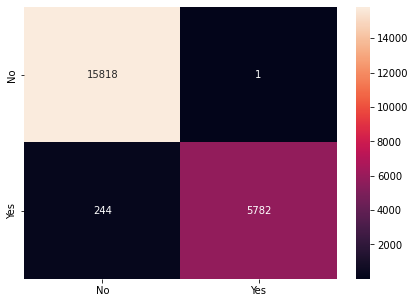

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.96      0.98      6026
           0       0.98      1.00      0.99     15819

    accuracy                           0.99     21845
   macro avg       0.99      0.98      0.99     21845
weighted avg       0.99      0.99      0.99     21845



In [ ]:
###KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn = classifier.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8931819569065494
0.8453192950331884


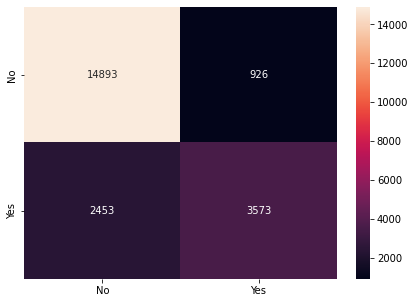

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.59      0.68      6026
           0       0.86      0.94      0.90     15819

    accuracy                           0.85     21845
   macro avg       0.83      0.77      0.79     21845
weighted avg       0.84      0.85      0.84     21845



In [ ]:
### SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
svm=classifier.fit(X_train, y_train)
y_predict = svm.predict(X_test)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.9882194958188366
0.9888303959716183


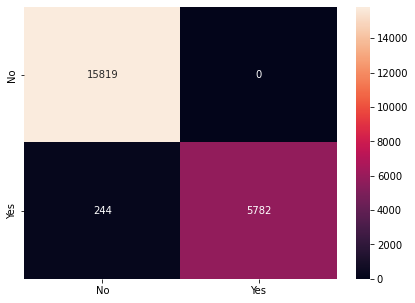

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.96      0.98      6026
           0       0.98      1.00      0.99     15819

    accuracy                           0.99     21845
   macro avg       0.99      0.98      0.99     21845
weighted avg       0.99      0.99      0.99     21845



In [ ]:
###Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
nv = classifier.fit(X_train, y_train)
y_predict = nv.predict(X_test)
print(nv.score(X_train,y_train))
print(nv.score(X_test,y_test))

0.9715406213758164
0.9722133211261158


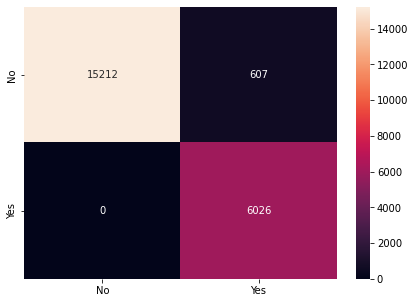

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      1.00      0.95      6026
           0       1.00      0.96      0.98     15819

    accuracy                           0.97     21845
   macro avg       0.95      0.98      0.97     21845
weighted avg       0.97      0.97      0.97     21845



In [ ]:
###DessionTree
from sklearn.tree import DecisionTreeClassifier
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, random_state=0)
DT=dTreeR.fit(X_train, y_train)
y_predict=DT.predict(X_test)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9882347555392785
0.9888761730373083


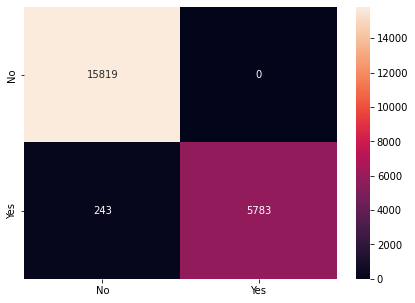

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.96      0.98      6026
           0       0.98      1.00      0.99     15819

    accuracy                           0.99     21845
   macro avg       0.99      0.98      0.99     21845
weighted avg       0.99      0.99      0.99     21845



In [ ]:
##Bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_train,y_train))
print(bgcl.score(X_test,y_test))

1.0
1.0


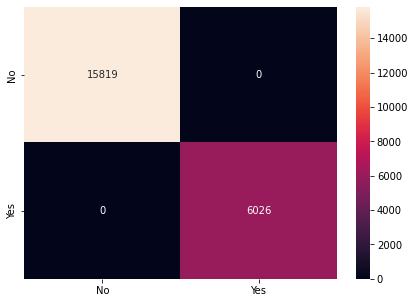

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6026
           0       1.00      1.00      1.00     15819

    accuracy                           1.00     21845
   macro avg       1.00      1.00      1.00     21845
weighted avg       1.00      1.00      1.00     21845

